### Graph Function with Correlation and Linear Regression

In [1]:
#importing the librarys.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

**Introduction** 
We have created an intresting function in python in which you just need to the keep the dataset in default location and call that dataset in our function. 

INDEX
1. Results will produce Histogram, Barplots and Boxplots among different variables and store them as images.
2. First Improvization : You will have visibility to all the possible correlation between all the numerical variables.
3. Second Improvization : You can then proceed with Simple Linear Regression with an input and predictor variable of your choice.

In [2]:
def Graph(dataset,columns=[],dir='C:\\Users\\hp1\\Desktop\\Graph_Function_Data'):   
    
    if len(columns)==0:
        columns=list(dataset.columns)  # if no columns are specified the operation takes place on all columns
    os.chdir(dir) 
    num_var=[]
    cat_var=[]  
    
    # Find  weather the variable is numerical or categorical
    for var in columns:
        a=dataset[var].nunique()
        if(a>50 and dataset[var].dtype in ['float64','int64']):
            num_var.append(var)
        else:
            cat_var.append(var)
            
    # Plotting Histogram
    for col in num_var:
        dataset.hist(column=col,grid=False,figsize=(6,4), bins=10) # removes the grids
        plt.savefig(str(col)+'_Histogram.png')   # Saves the plot with column name for better refernce
        plt.close() # releases the memory as we have generated graphs for each variable
    
    # Plotting Box plot
        dataset.boxplot(column=col,notch=True,grid=False,figsize=(6,4))
        plt.savefig(str(col)+'_Box_Plot.png')
        plt.close()
    
    # Plotting Bar Graph
    for col1 in cat_var:
        dataset[col1].value_counts().plot(kind='bar',figsize=(4,4),color='coral',fontsize=13)
        plt.savefig(str(col1)+'_Box_Plot.png')
        plt.close()
        
    # First Improvisation : Plotting Correlation between multiple variables.

    data_corr = dataset.corr()
    var_list = list(data_corr.columns)
    thre_min = -0.5
    thre_max = 0.5
    corr_list = {}
    count = 0
    for i in var_list:
        columns = eval('dict(data_corr.'+i+')') #converting dataset.corr() into dictionary and accessings column of 
        #that dictionary.
        max_list=[]
        for key,value in columns.items():  # accessing keys and values of "columns" - dictionary 
            if (value>thre_max or value<thre_min ) and key!=i: #avoiding comparision of column with itself, 
                #where corr is 1 
                max_list.append([key,value])
        corr_list[i]=pd.Series(max_list)

    pd.DataFrame(corr_list)

    print('Histograms, Box-Plots and Bar graph for variables are avaliable in : C:\\Users\\hp1\\Desktop\\Graph_Function_Data')
    print('Correlation among the variables are displayed below')
    print(pd.DataFrame(corr_list))
    print('')
    print('Based on above correlation please select input and output column index for Linear Regression ')
    print(pd.Series(dataset.columns))
    
    #dataset=dataset.loc[dataset.MPG!=0]
    while True:

        prompt=input("Want to compute Linear Regression for your dataset: Y/N: ")
        if prompt=='Y':
            Target=input("Enter col index of input variable: ")
            Predictor=input("Enter col index of predictor variable: ")
            #try: 
             #   if Target.dtype in ['float64','int64']:
            linear_regression(Target,Predictor)
        else:
            print('Thank you!')
            break
            
            
# Second Improvisation :  Plotting Correlation between multiple variables.
def linear_regression(Target,Predictor):
    
    test = int(Target)
    test1 = int(Predictor)
    x=dataset.iloc[:,test].values
    y=dataset.iloc[:,test1].values
    
    x=np.array(x)
    y=np.array(y)
    #print(x)
    #Coefficient of regression
    b0=((np.sum(y)*np.sum(x**2))-np.sum(x)*np.sum(x*y))/(len(x)*np.sum(x**2)-(np.sum(x)**2))
    b1=(len(x)*np.sum(x*y)-np.sum(x)*np.sum(y))/(len(x)*np.sum(x**2)-(np.sum(x)**2))
    
    #Regression line
    reg_line=[b0+b1*i for i in x ]
    
    #Scatter plot with regression line
    plt.scatter(x,y, color='r') 
    plt.plot(x,reg_line)
    plt.xlabel(dataset.columns[test], fontsize=12)
    plt.ylabel(dataset.columns[test1], fontsize=12)
    plt.title("Scatter plot", fontsize=14)
    print('RMSE',math.sqrt(sum((reg_line - y)**2)/(len(y)-1)))
    
    #Saving the image
    plt.savefig('Linear_Regression.png')
    plt.show()
    plt.close()


Histograms, Box-Plots and Bar graph for variables are avaliable in : C:\Users\hp1\Desktop\Graph_Function_Data
Correlation among the variables are displayed below
                                   MPG                           Cylinders  \
0     [Cylinders, -0.7355626558680717]          [MPG, -0.7355626558680717]   
1  [Displacement, -0.7642770516061633]  [Displacement, 0.9517870386276701]   
2     [Horsepower, -0.726670203189647]    [Horsepower, 0.8234670042496849]   
3        [Weight, -0.7875099405047027]        [Weight, 0.8952204775128882]   
4          [Model, 0.5862336418632486]  [Acceleration, -0.522451512421053]   

                          Displacement                           Horsepower  \
0           [MPG, -0.7642770516061633]            [MPG, -0.726670203189647]   
1      [Cylinders, 0.9517870386276701]      [Cylinders, 0.8234670042496849]   
2     [Horsepower, 0.8737582991424478]   [Displacement, 0.8737582991424478]   
3         [Weight, 0.9324746504807497]          [Weig

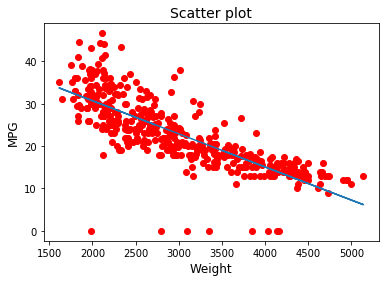

Want to compute Linear Regression for your dataset: Y/N: Y
Enter col index of input variable: 4
Enter col index of predictor variable: 1
RMSE 5.771907400632407


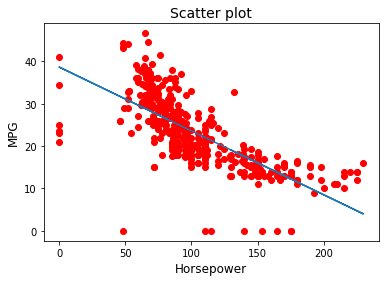

Want to compute Linear Regression for your dataset: Y/N: Y
Enter col index of input variable: 5
Enter col index of predictor variable: 3
RMSE 37.901707964083194


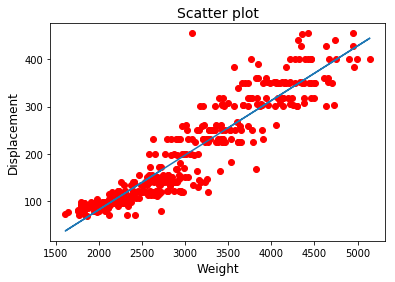

Want to compute Linear Regression for your dataset: Y/N: N
Thank you!


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
os.chdir("C:\\Users\\hp1\\Desktop\\DataScience_Praxis\\Term I\\Python")
dataset = pd.read_csv("cars.csv") # input the file name of your dataset here.
Graph(dataset)